In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# loading the dataset (Download from kaggle)
df = pd.read_csv('Twitter_Analysis.csv',delimiter=',',encoding='latin-1',names=['target','id','date','flag','user','text'],on_bad_lines='skip', engine='python', quotechar='"')

In [4]:
df = df.sample(n=30000,random_state=42)
df.shape

(30000, 6)

In [5]:
df.head()

,target,id,date,flag,user,text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [6]:
# Keeping text and target
df = df[['target','text']]

In [7]:
df.head()

,target,text
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem


In [8]:
# Cleaning the text( removing the unwanted stuff, removing stop word and doing stemming)
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk


# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt_tab')
# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'@[A-Za-z0-9]+',' ',text)  #remove mentions
  text = re.sub(r'#',' ',text) #remove hastags
  text = re.sub(r'RT[\s]+',' ',text) #Remove RT link
  text = re.sub(r'https?:\/\/\S+',' ',text) #Remove https links
  text = re.sub(r'&amp',' ',text) #Remove HTML character &AMP
  text = re.sub(r'\s+',' ',text).strip() # Remove extra spaces

  words = word_tokenize(text) # tokenize the words
  # removing stop words and apply stemming
  final_words = [stemmer.stem(word) for word in words if word not in stop_words]
  return ' '.join(final_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
df['text'] = df['text'].apply(clean_text)

In [10]:
# convert 0->0 as negtaive and 4->1 as positive
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1 )
df.head()

,target,text
541200,0,ahhh hope ok ! ! !
750,0,"cool , tweet app razr 2"
766711,0,know famili drama . lame.hey next time u hang ...
285055,0,school email wo n't open geographi stuff revis...
705995,0,upper airway problem


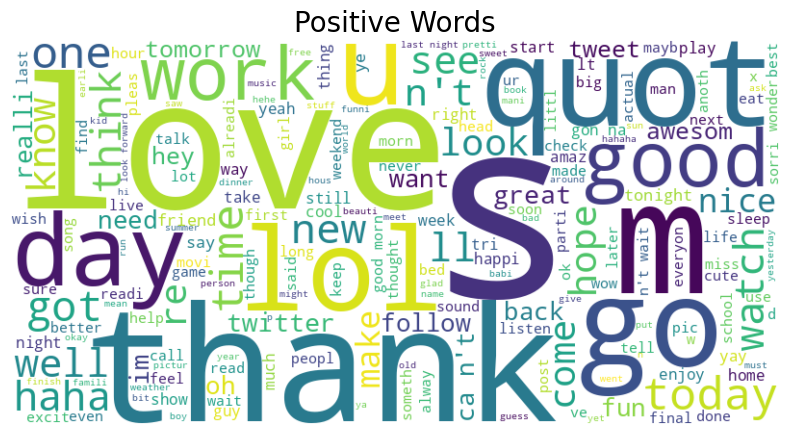

In [11]:
# Looking at the  positive tweet word cloud
from wordcloud import WordCloud
# positive Tweets wordcloud
text = ' '.join(df[df['target']==1]['text'])
# Generate the word cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
#plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Positive Words', fontsize=20)
plt.axis('off')
plt.show()

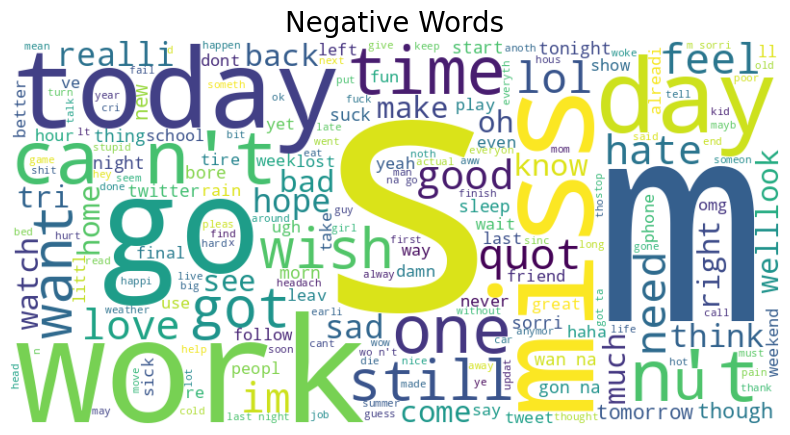

In [12]:
# Looking at the  Negative tweet word cloud
from wordcloud import WordCloud
# positive Tweets wordcloud
text = ' '.join(df[df['target']==0]['text'])
# Generate the word cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
#plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Negative Words', fontsize=20)
plt.axis('off')
plt.show()

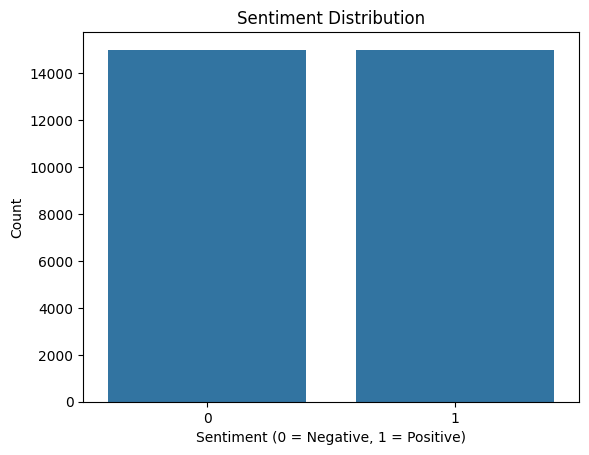

In [13]:
import seaborn as sns

# Plot the sentiment distribution
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

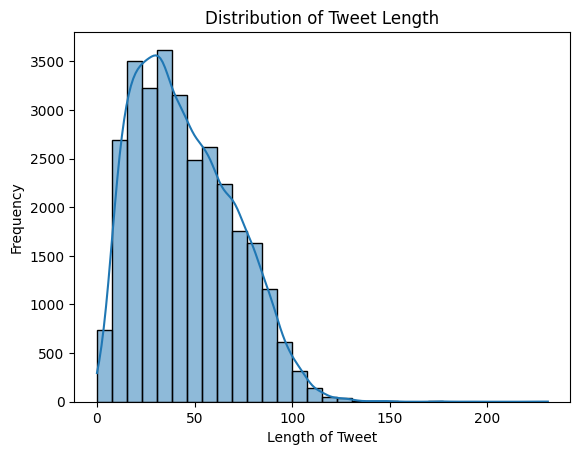

In [14]:
# plot text length
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'],bins=30,kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()

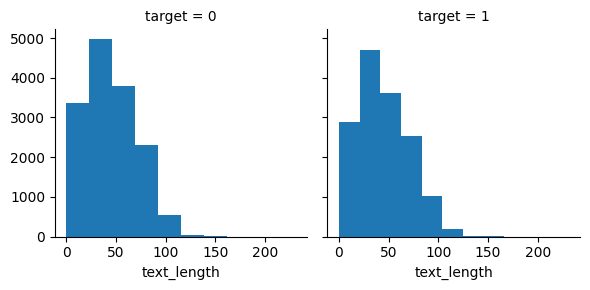

In [15]:
# plot histogram of length for each sentiment
g = sns.FacetGrid(df,col='target')
g.map(plt.hist,'text_length')
plt.show()

In [19]:
# Converting the text into vectorizer form
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=20000)
X = cv.fit_transform(df['text']).toarray()

In [30]:
y = df['target'].values

In [31]:
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
y[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [33]:
# splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [34]:
# Training the model on Naive Bayes
from sklearn.naive_bayes import MultinomialNB
naive_clf = MultinomialNB()
naive_clf.fit(X_train,y_train)

MultinomialNB()

In [35]:
# Evaluating the model on cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(naive_clf,X_train,y_train,cv=10,scoring='accuracy')
print(f'The score is {score.mean()}')
print(f'The varaiation is {score.std()}')

The score is 0.7344166666666667
The varaiation is 0.011643131022195018


The accuracy score is 0.7353333333333333


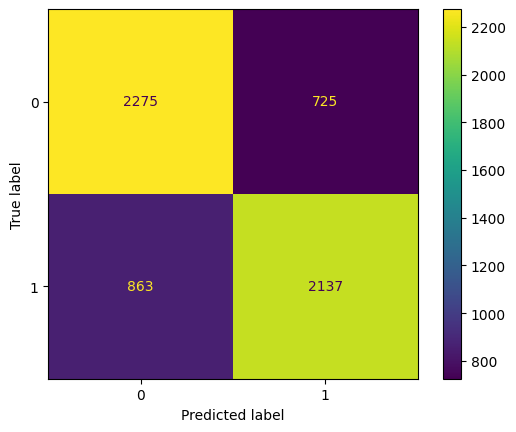

In [36]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
y_pred = naive_clf.predict(X_test)
print(f'The accuracy score is {accuracy_score(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(naive_clf,X_test,y_test)

In [37]:
# testing on my new tweets
tweets = ['I donot like the internt but happy to use it # internet service@gointernet']
# clean them
tweets = [clean_text(tweets) for tweet in tweets]
# Vectorize the tweet
X_new = cv.transform(tweets).toarray()
# Predicting the array
naive_clf.predict(X_new)

array([1])